__Chapter 3 - A tour of machine learning classifiers using scikit-learn__

1. [First steps with sklearn - training a perceptron](#First-steps-with-sklearn-training-a-perceptron)
1. [Modeling class probabilities w/ logistic regression](#Modeling-class-probabilities-w/-logistic-regression)
    1. [Intuition: logistic regression](#Intuition-logistic-regression)

Key topics:
- Explore several different supervised machine learning classifiers
- Learn the mechanics of the machine learning algorithms
- Understand strengths and weaknesses of each classifier

<a id = ''></a>

In [43]:
import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:78% !important; }</style>"))

import os
import sys
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

modulePath = os.path.abspath(os.path.join('../../Visualization'))
if modulePath not in sys.path:
    sys.path.append(modulePath)
import vizStyle
import viz
import vizUtil
sns.set(rc = vizStyle.rcGrey)

# Settings
np.set_printoptions(threshold = np.inf, suppress = True)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


<a id = ''></a>

# First steps with sklearn - training a perceptron

<a id = 'Choosing-a-classifier'></a>

## Choosing a classifier
-Five key steps in training an algorithm
    1. Select features and collect training data
    2. Choose a performance metric
    3. Choose a classifier and optimization algorithm
    4. Evaluate model performance
    5. Tune the algorithm's parameters
Evaluate several different classifers.

In [5]:
# Load data and inspect class labels

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels: {0}'.format(np.unique(y)))


Class labels: [0 1 2]


In [11]:
# Train/test split
# Stratify ensures proportional distribution of classes between the train/test data

xTrain, xTest, yTrain, yTest = train_test_split(X, y
                                ,test_size = 0.3, random_state = 1, stratify = y)

print('Label counts in y: {}'.format(np.bincount(y)))
print('Label counts in yTrain: {}'.format(np.bincount(yTrain)))
print('Label counts in yTest: {}'.format(np.bincount(yTest)))

Label counts in y: [50 50 50]
Label counts in yTrain: [35 35 35]
Label counts in yTest: [15 15 15]


In [14]:
# Scale data

sc = StandardScaler()
sc.fit(xTrain)
xTrainStd = sc.transform(xTrain)
xTestStd = sc.transform(xTest)

In [32]:
# Review how first feature changes after standard scaling

print('Original mean: {0}'.format(round(xTrain[:,0].mean(),5)))
print('Original standard deviation: {0}'.format(round(xTrain[:,0].std(),5)))
print()
print('Scaled mean: {0}'.format(round(xTrainStd[:,0].mean(),5)))
print('Scaled standard deviation: {0}'.format(round(xTrainStd[:,0].std(),5)))

Original mean: 3.78952
Original standard deviation: 1.793

Scaled mean: 0.0
Scaled standard deviation: 1.0


> Remarks - Standard scaling uses the mean $\mu$ and standard deviation $\sigma$ to alter each feature independently such that each feature has a $\mu = 0$ and a $\sigma = 0$

> It is important to transform the test dataset using the fit performed on the training set only. First, we want the train and test data to be scaled in the same way. Further, we're assuming we don't know about the test data, and in practice new unseen data will need to be scaled based on the existing scaling operation defintions.

In [37]:
# Instantiate Perceptron and fit model

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(xTrainStd, yTrain)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

> Remarks - 
- 'n_iter' limits the number epochs or iterations
- 'eta0' controls to learning rate. A value too high will likely overshoot the minimum. A value too low will make the learning process unnecessarily slow.

In [44]:
# Predictions with misclassification score

yPred = ppn.predict(xTestStd)
print('Misclassified samples: {0}'.format((yTest != yPred).sum()))


Misclassified samples: 3


>Remarks - 3 out of 45 samples are incorrectly predicted, yieled an misclassification percent of ~6.7%

In [50]:
# Accuracy score

print('Accuracy: {}'.format(round(accuracy_score(yPred, yTest), 3)))


Accuracy: 0.933


In [51]:
# Alternative 'score' method combines predict and accuracy_score

print('Accuracy: {}'.format(round(ppn.score(xTestStd, yTest), 3)))


Accuracy: 0.933


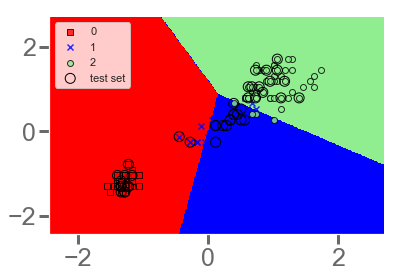

In [88]:
from matplotlib.colors import ListedColormap

def plotDecisionRegions(X, y, classifier, testIdx = None, resolution = 0.02):
    """
    Info:
        Description:
        
        Parameters:
            X : Array
            y : Array
            classifier : sklearn model
            testIdx :  , default = None
            resolution : float, default = 0.02
    """
    # objects for marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1Min, x1Max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2Min, x2Max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1Min, x1Max, resolution)
                          ,np.arange(x2Min, x2Max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, slpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    
    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0]
                   ,y = X[y == cl, 1]
                   ,alpha = 0.8
                   ,c = colors[idx]
                   ,marker = markers[idx]
                   ,label = cl
                   ,edgecolor = 'black')
    
    # Highlight test samples
    if testIdx:
        xTest, yTest = X[testIdx, :], y[testIdx]
        plt.scatter(xTest[:,0]
                    ,xTest[:,1]
                    ,c = ''
                    ,edgecolor = 'black'
                    ,alpha = 1.0
                    ,linewidth = 1
                    ,marker = 'o'
                    ,s = 100
                    ,label = 'test set'                   
                   )

xCombined = np.vstack((xTrainStd, xTestStd))
yCombined = np.hstack((yTrain, yTest))
plotDecisionRegions(X = xCombined
                   ,y = yCombined
                   ,classifier = ppn
                   ,testIdx = range(105,150))
plt.legend(loc = 'upper left')

<a id = 'Modeling-class-probabilities-w/-logistic-regression'></a>

# Modeling class probabilities w/ logistic regression

<a id = 'Intuition-logistic-regression'></a>

## Intuition: logistic regression

In [ ]:
bbbbb